### **Feature Selection Methods**

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("dataCleaned.csv")
df.drop(df.columns[0], axis=1, inplace=True)
df

,team_code,Opponent_code,season,Round_code,Venue_code,Referee_code,Formation_code,Day_code,GF_rolling,GA_rolling,win_rolling,draw_rolling,lose_rolling,Result_code
0,0,5,2010,32,1,41,19,5,3.000000,0.666667,0.666667,0.333333,0.000000,2
1,0,31,2010,33,0,35,12,5,4.000000,0.666667,1.000000,0.000000,0.000000,0
2,0,35,2010,34,1,25,12,5,2.333333,1.000000,0.666667,0.333333,0.000000,1
3,0,11,2010,35,0,27,19,6,2.333333,1.666667,0.333333,0.333333,0.333333,1
4,0,2,2010,36,1,24,19,5,1.000000,2.000000,0.000000,0.333333,0.666667,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,38,8,2022,27,0,9,18,5,1.666667,0.666667,0.666667,0.000000,0.333333,1
9759,38,1,2022,28,1,41,18,5,1.000000,2.666667,0.333333,0.000000,0.666667,2
9760,38,21,2022,29,0,13,18,5,1.000000,2.000000,0.666667,0.000000,0.333333,1
9761,38,13,2022,30,1,9,18,5,0.333333,2.666667,0.333333,0.000000,0.666667,0


In [ ]:
#Separate inputs and outputs
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values
y

array([2, 0, 1, ..., 1, 0, 1])

### **Information Gain**

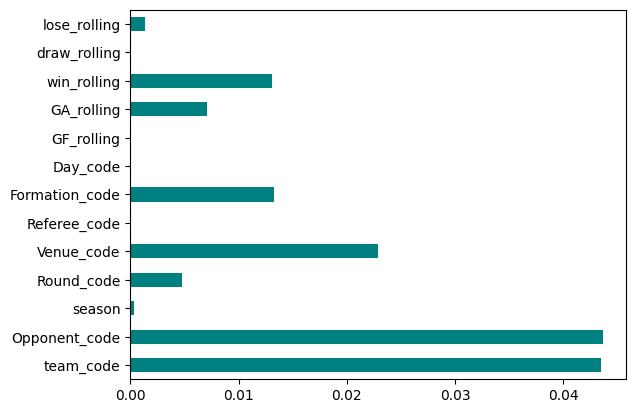

In [ ]:
#It calculates the reduction in entropy from the transformation of a dataset.
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()


### **Fisher’s Score**

In [ ]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt

# Calculating scores
ranks = fisher_score.fisher_score(X, y)

#Plotting the ranks
feat_importances = pd.Series(ranks, df.columns[0:len(df.columns)-1])
feat_importances.plot(kind = 'barh', color = 'teal')
plt.show()

### **Correlation Coefficient**

```
# This is formatted as code
```




<Axes: >

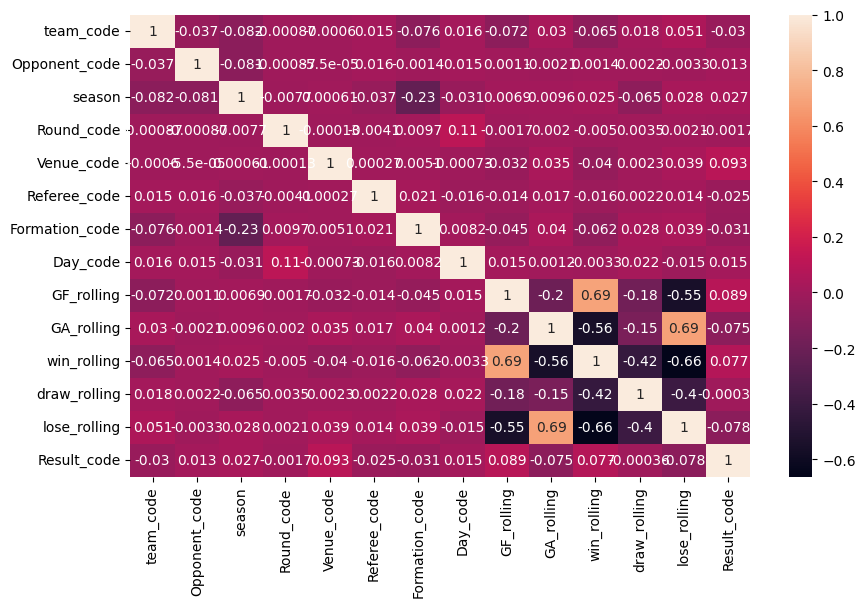

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
cor = df.corr()

# Plotting Heatmap
plt.figure(figsize = (10,6))
sns.heatmap(cor, annot = True)

### **Variance Threshold**
*italicised text*

In [ ]:
from sklearn.feature_selection import VarianceThreshold


v_threshold = VarianceThreshold (threshold=0)
v_threshold.fit(X) # fit finds the features with zero variance
v_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

### **Variance Threshold**

<BarContainer object of 13 artists>

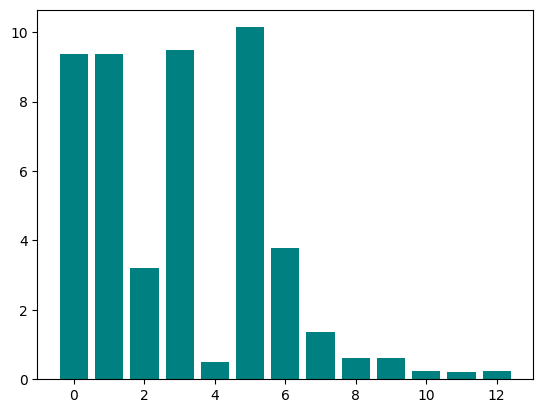

In [ ]:
# Calculate MAD
mean_abs_diff = np.sum(np.abs(X-np.mean(X, axis = 0)), axis = 0)/X.shape[0]

# Plot the barchart
plt.bar(np.arange(X.shape[1]), mean_abs_diff, color = 'teal')